<a href="https://colab.research.google.com/github/23521316/ComputerVision/blob/main/OCRwithPyTesseractandEasyOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,432 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [11]:
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



In [19]:

!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr.png -O ocr.png

!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr2.png -O ocr2.png
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr3.png -O ocr3.png



--2024-11-09 13:54:49--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13250 (13K) [image/png]
Saving to: ‘ocr.png’

ocr.png             100%[===================>]  12.94K  --.-KB/s    in 0s      

2024-11-09 13:54:49 (86.0 MB/s) - ‘ocr.png’ saved [13250/13250]

--2024-11-09 13:54:49--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-11-09 13:54:50 ERROR 404: Not

In [21]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr4.jpeg -O ocr4.jpeg

--2024-11-09 13:56:24--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/ocr4.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24612 (24K) [image/jpeg]
Saving to: ‘ocr4.jpeg’

ocr4.jpeg           100%[===================>]  24.04K  --.-KB/s    in 0.002s  

2024-11-09 13:56:24 (10.8 MB/s) - ‘ocr4.jpeg’ saved [24612/24612]



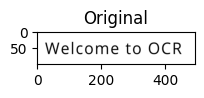

PyTesseract Extracted: Welcome to OCR



In [22]:
img = cv2.imread('ocr.png')
imshow("Original", img)


output_txt = pytesseract.image_to_string(img)
print("PyTesseract Extracted: {}".format(output_txt))

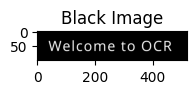

Pytesseract Extracted: Welcome to OCR



In [23]:
img1 = cv2.imread('ocr2.png')
imshow("Black Image", img1)

output_txt = pytesseract.image_to_string(img1)
print("Pytesseract Extracted: {}".format(output_txt))

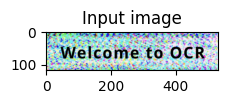

Pytesseract Extracted:  



In [24]:
img2 = cv2.imread('ocr3.png')
imshow("Input image", img2)

output_txt = pytesseract.image_to_string(img2)
print("Pytesseract Extracted: {}".format(output_txt))

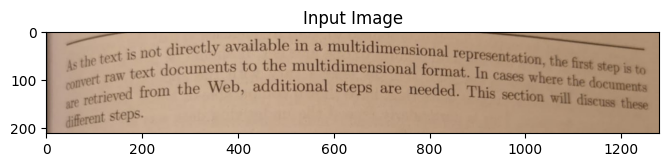

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [26]:
img = cv2.imread('ocr4.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

In [28]:
!pip install scikit-image


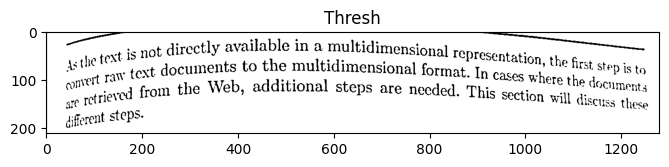

PyTesseract Extracted: j a j multidimensional r
irectly available in a 4
ne text is not direct nts to the multidimensional form,
Ath aw text fo Web, additional steps are necde
‘onl

Cpresentation, the first step is to
at. In cases where the documents

d. This section will discuss these
convert r

are ret rieved fr
diferent StePS-



In [33]:
from skimage.filters import threshold_local

images = cv2.imread('ocr4.jpeg')

V = cv2.split(cv2.cvtColor(images, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset = 15, method = "gaussian")

thresh = (V > T).astype("uint8") * 255
imshow("Thresh", thresh, size = 48)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

In [35]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg -O Receipt-woolworth.jpg

--2024-11-09 14:20:34--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.02s   

2024-11-09 14:20:34 (3.87 MB/s) - ‘Receipt-woolworth.jpg’ saved [93450/93450]



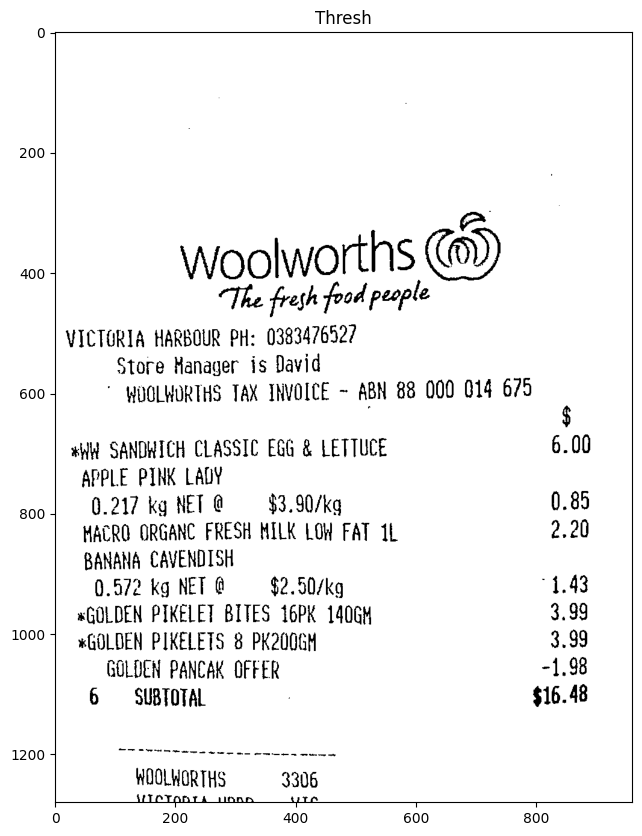

Pytesseract Extractor: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WOOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
G.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH NILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2OOGH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

WOOLWORTHS 3306

tITAT ANT A DIAnR



In [44]:
from skimage.filters import threshold_local

image = cv2.imread('Receipt-woolworth.jpg')

V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset = 15, method = "gaussian")

thresh = (V > T).astype("uint8") * 255
imshow("Thresh", thresh)

output_text = pytesseract.image_to_string(thresh)
print("Pytesseract Extractor: {}".format(output_text))

In [45]:
from pytesseract import Output

image = cv2.imread('Receipt-woolworth.jpg')

d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


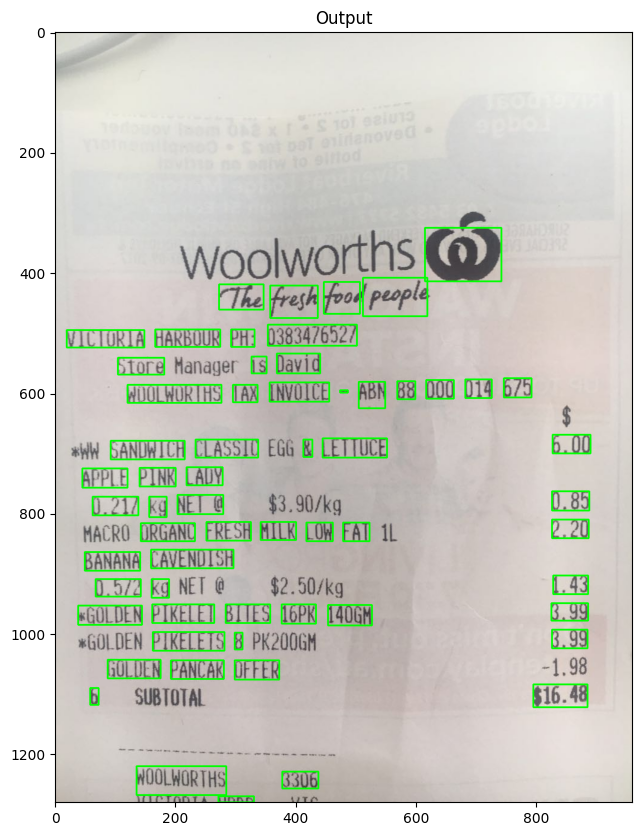

In [48]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

imshow("Output", image)

In [49]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 16.0 MB/s eta 0:00:00


In [50]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg -O whatsapp_conv.jpeg

--2024-11-09 14:42:54--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91841 (90K) [image/jpeg]
Saving to: ‘whatsapp_conv.jpeg’

whatsapp_conv.jpeg  100%[===================>]  89.69K  --.-KB/s    in 0.02s   

2024-11-09 14:42:54 (3.58 MB/s) - ‘whatsapp_conv.jpeg’ saved [91841/91841]



In [52]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.10.0.84

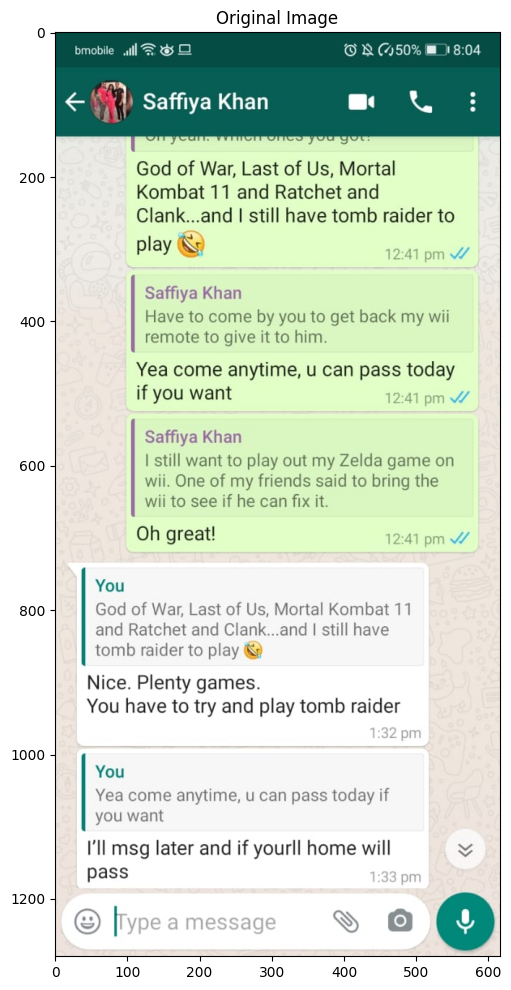

Detecting and OCR'ing text from input image...
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteCompleted in 22.68229913711548 seconds


In [54]:
from matplotlib import pyplot as plt
import cv2
from easyocr import Reader
import numpy as np
import pandas as pd
import time

def imshow(title="Image", image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

image = cv2.imread('whatsapp_conv.jpeg')
imshow("Original Image", image, size=12)

print("Detecting and OCR'ing text from input image...")
reader = Reader(['en'], gpu = False)

ts = time.time()
result = reader.readtext(image)
te = time.time()
td = te - ts
print(f'Completed in {td} seconds')


In [56]:
result

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile _ill < 82',
  0.12457802840124284),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.3369437989007717),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9920759797096252),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7756983803537445),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.9911833572848934),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.908146954391923),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.859354745826267),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.7085109262712401),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9720005937874658),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8657418620480265),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.984380966

Probability of Text: 12.458% OCR'd Text: bmobile _ill < 82
Probability of Text: 33.694% OCR'd Text: "'0 ^ (50%
Probability of Text: 99.208% OCR'd Text: 8.04
Probability of Text: 77.570% OCR'd Text: Saffiya Khan
Probability of Text: 99.118% OCR'd Text: God of
Probability of Text: 90.815% OCR'd Text: Last of Us, Mortal
Probability of Text: 85.935% OCR'd Text: Kombat 11 and Ratchet and
Probability of Text: 70.851% OCR'd Text: Clank__and
Probability of Text: 97.200% OCR'd Text: still have tomb raider to
Probability of Text: 86.574% OCR'd Text: play
Probability of Text: 98.438% OCR'd Text: 12.41 pm
Probability of Text: 99.971% OCR'd Text: Saffiya Khan
Probability of Text: 58.658% OCR'd Text: Have to come by you to get back my wii
Probability of Text: 55.833% OCR'd Text: remote to give it to him:
Probability of Text: 77.152% OCR'd Text: Yea come anytime, U can pass today
Probability of Text: 69.669% OCR'd Text: if you want
Probability of Text: 72.726% OCR'd Text: 12.41 pm
Probability of Text

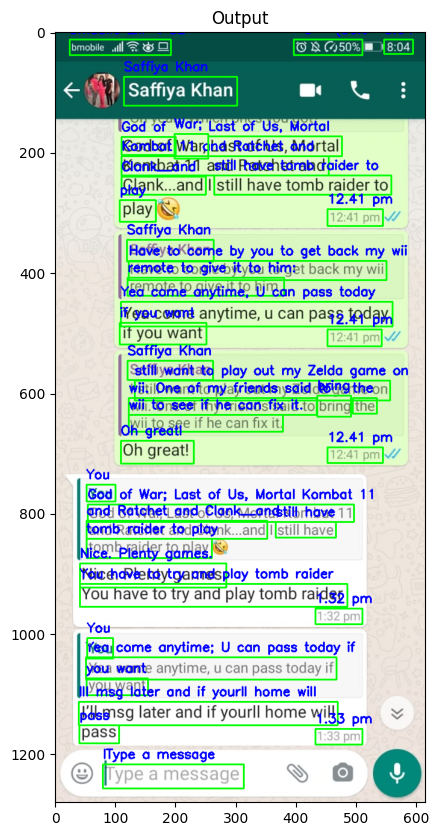

In [58]:
all_text = []

for (bbox, text, prob) in result:
  print(f"Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))

  text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
  all_text.append(text)
  cv2.rectangle(image, tl, br, (0, 255, 0), 2)
  cv2.putText(image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

imshow("Output", image)

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0898: bmobile   ع6 = الء
[INFO] 0.2573: 0 4 650%
[INFO] 0.9989: 8:04
[INFO] 0.8150: Saffiya Khan
[INFO] 0.6963: God of
[INFO] 0.8493: Last of Us, Mortal
[INFO] 0.7110: Kombat 1 1 and Ratchet and
[INFO] 0.5183: Clank   and
[INFO] 0.6115: still have tomb raider to
[INFO] 0.6466: play
[INFO] 0.8463: 12:41 pm
[INFO] 0.5336: Saffiya Khan
[INFO] 0.7753: Have to come by you to get back my wii
[INFO] 0.6525: remote to give it to him.
[INFO] 0.5914: Yea come anytime, u can pass today
[INFO] 0.9812: if you want
[INFO] 0.7166: 12:41 pm
[INFO] 0.7968: Saffiya Khan
[INFO] 0.6186: still want to play out my Zelda game on
[INFO] 0.6747: wii. One of my friends said to
[INFO] 0.6394: the
[INFO] 0.6152: wii to see if he can fIx it
[INFO] 0.9849: Oh great!
[INFO] 0.6851: 12:41 pm
[INFO] 0.6375: Vou
[INFO] 0.6736: God of War Last of Us, Mortal Kombat 1 1
[INFO] 0.4785: and Ratchet and Clank   and
[INFO] 0.9933: still hav

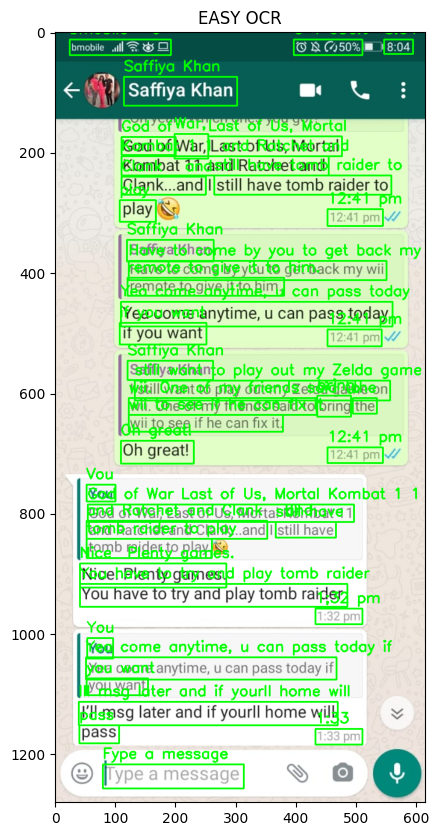

EASY OCR Extracted: You


In [59]:
import cv2
from easyocr import Reader
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

def clean_text(text):
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

image = cv2.imread('whatsapp_conv.jpeg')

reader = Reader(["en","ar"], gpu=False)
results = reader.readtext(image)

for (bbox, text, prob) in results:
	print("[INFO] {:.4f}: {}".format(prob, text))

	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))